In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
# https://plotly.com/python/v3/ipython-notebooks/markowitz-portfolio-optimization/
import pas 
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode
# from example
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#! pip install cvxopt
import cvxopt as opt
from cvxopt import blas, solvers
import pandas as pd

import plotly
#import cufflinks

np.random.seed(123)

# Turn off progress printing 
solvers.options['show_progress'] = False

In [125]:
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.rand(n)
    return k / sum(k)

#print(rand_weights(num_authors))
#print( rand_weights(num_authors))

def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''

    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    # This recursion reduces outliers to keep plots pretty
    if sigma > 2:
        return random_portfolio(returns)
    return [mu, sigma, w]

def optimal_portfolio(returns):
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks, portfolios

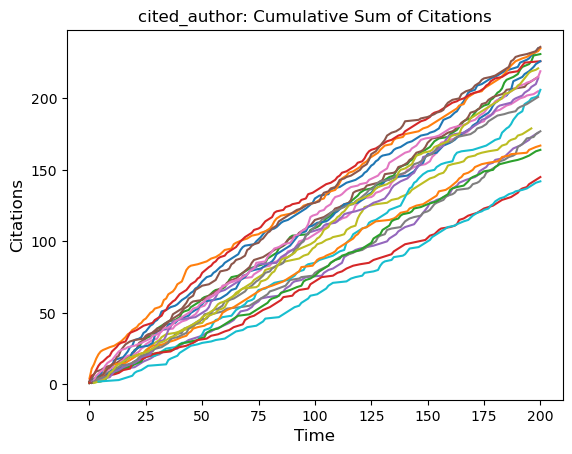

In [102]:
num_authors = 20
steps = 200
papers = pas.init_web(num_authors)
df = pas.take_steps(papers, steps, num_authors).astype(int)
pas.plot_cumsum(df,df['cited_author'].unique(), var = 'cited_author', legend = False)
returns = pas.get_returns(df,num_authors, cumulative_time = False)
#returns.iloc[:,0].plot()

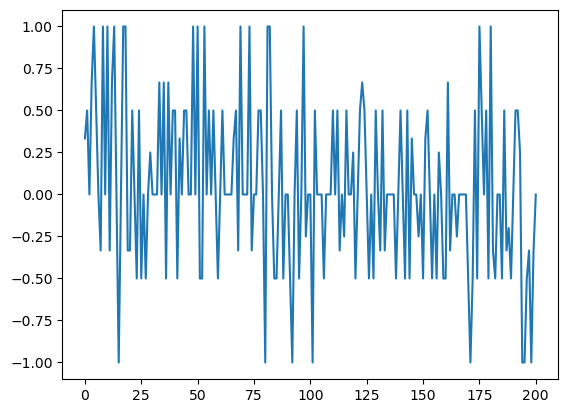

In [139]:
#plt.plot(returns)
plt.plot(returns.iloc[0])

In [17]:
returns = pas.get_returns(df,num_authors, cumulative_time = False)
#df['time'].unique()
#t = 10
df[df['time'] == 52]['cited_author'].value_counts().sort_index()

cited_author
0    1
1    1
2    1
3    1
Name: count, dtype: int64

In [18]:
## NUMBER OF ASSETS
n_assets = 20

## NUMBER OF OBSERVATIONS
n_obs = 60
# assests are the rows and observations are the columns
return_vec = np.random.randn(n_assets, n_obs)



In [121]:
#random_portfolio(returns)
#r_transpose = returns.T
# A difference between sci returns and the example is that there isn't a lot of variation in the dataset. 
n_portfolios = 2000
#means, stds, weights
rp = [random_portfolio(returns) for _ in range(n_portfolios)]

means, stds = np.column_stack([rp[i][:2] for i in range(len(rp))])
weights = np.array([rp[i][-1] for i in range(len(rp))])
weights.flatten()[:3]#[:3]#[0][0]
flat_weights = []
for i,w in enumerate(weights):
    flat_weights.append(list(w.flatten()))
flat_weights = np.array(flat_weights)

#means_example, stds_example = np.column_stack([    random_portfolio(return_vec)     for _ in range(n_portfolios)])

In [130]:
#plt.bar(np.arange(len(flat_weights[0])),flat_weights[10])
#plt.bar(
#plt.bar(np.arange(20),op_weights[0])
#op_weights
#op_risks#,
#op_returns
p[0][

SyntaxError: incomplete input (105946971.py, line 7)

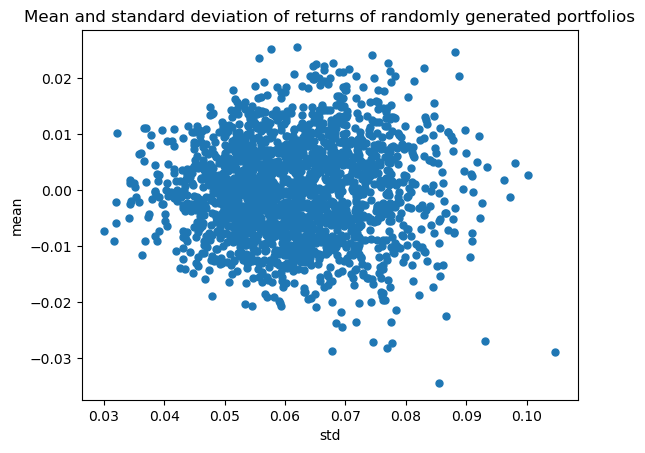

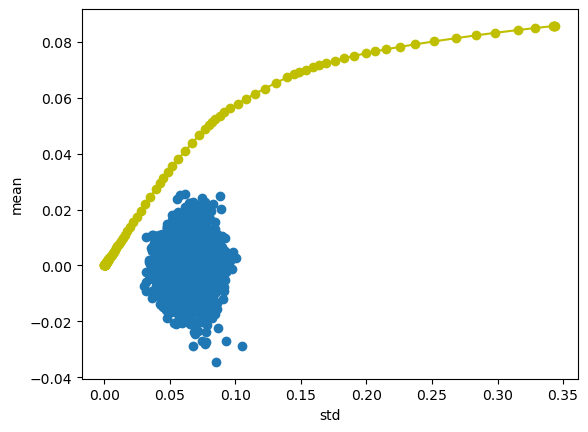

In [126]:
fig = plt.figure()
plt.plot(stds, means, 'o', markersize=5) # might adjust the width and height
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')
#py.iplot_mpl(fig, filename='mean_std', strip_style=True)


op_weights, op_returns, op_risks, p = optimal_portfolio(returns)

fig = plt.figure()
plt.plot(stds, means, 'o')
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(op_risks, op_returns, 'y-o')

NameError: name 'stds_example' is not defined

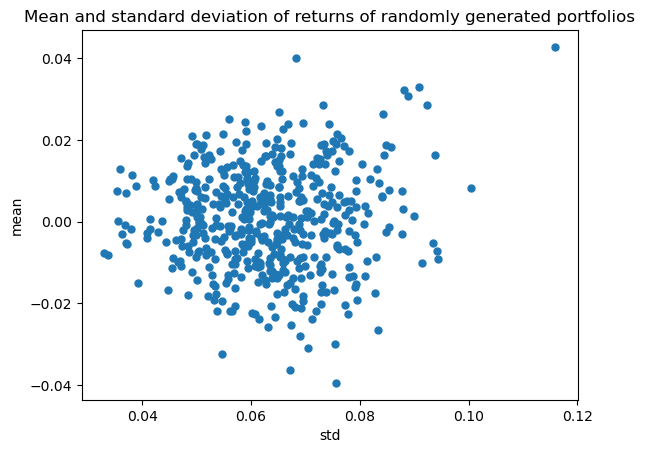

<Figure size 640x480 with 0 Axes>

In [98]:
fig = plt.figure()
plt.plot(stds, means, 'o', markersize=5) # might adjust the width and height
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')
#py.iplot_mpl(fig, filename='mean_std', strip_style=True)
fig = plt.figure()
plt.plot(stds_example, means_example, 'o', markersize=5) # might adjust the width and height
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')
#py.iplot_mpl(fig, filename='mean_std', strip_style=True)

weights_ex, returns_ex, risks_ex = optimal_portfolio(return_vec)

fig = plt.figure()
plt.plot(stds_example, means_example, 'o')
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(risks_ex, returns_ex, 'y-o')

weights, p_returns, p_risks = optimal_portfolio(returns)

fig = plt.figure()
plt.plot(stds, means, 'o')
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(p_risks, p_returns, 'y-o')

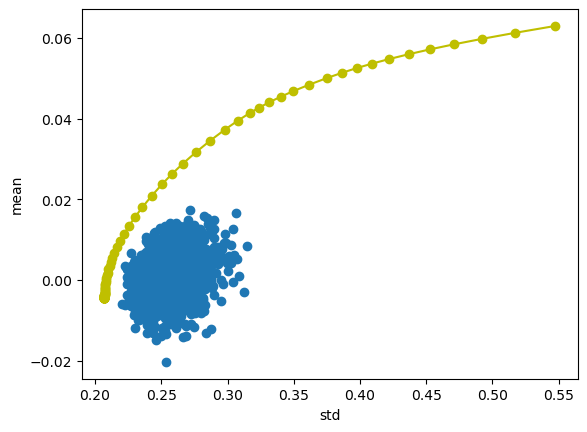

In [147]:
## NUMBER OF ASSETS
n_assets = 20

## NUMBER OF OBSERVATIONS
n_obs = 200

return_vec = np.random.randn(n_assets, n_obs)

n_portfolios = 2000
#means, stds, weights
rp = [random_portfolio(return_vec) for _ in range(n_portfolios)]

means_v, stds_v = np.column_stack([rp[i][:2] for i in range(len(rp))])
weights_v = np.array([rp[i][-1] for i in range(len(rp))])

flat_weights_v = []
for i,w in enumerate(weights_v):
    flat_weights_v.append(list(w.flatten()))
flat_weights_v = np.array(flat_weights_v)

weights_v, returns_v, risks_v, p_v = optimal_portfolio(return_vec)

fig = plt.figure()
plt.plot(stds_v, means_v, 'o')
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(risks_v, returns_v, 'y-o')
#py.iplot_mpl(fig, filename='efficient_frontier', strip_style=True)

In [49]:
return_vec

array([[-1.36385166, -0.59476282,  1.14379052, ...,  0.67822744,
         1.57583165,  0.54305083],
       [-0.14784416, -1.1357096 ,  3.03392506, ...,  0.721948  ,
        -0.25801714, -0.03005767],
       [ 0.10116009,  0.62277283, -0.79602792, ..., -1.82934642,
         0.9741791 , -0.6933265 ],
       [ 0.90756418,  1.68521718, -1.1163093 , ...,  0.78400653,
        -0.36309052, -0.2724664 ]])

Text(0.5, 1.0, 'Simulated Returns of a Financial Asset')

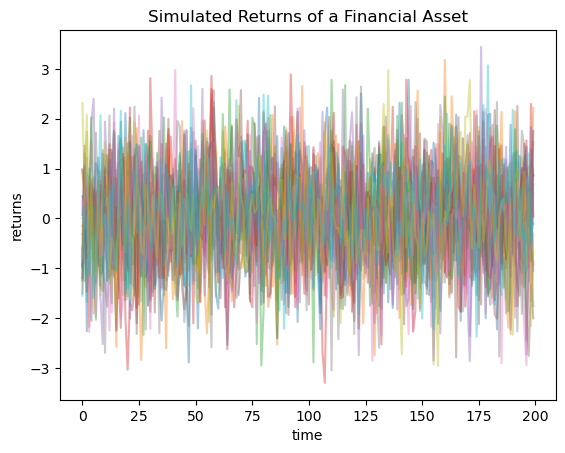

In [140]:


fig = plt.figure()
plt.plot(return_vec.T, alpha=.4);
plt.xlabel('time')
plt.ylabel('returns')
plt.title('Simulated Returns of a Financial Asset')
#plotly.iplot_mpl(fig, filename='s6_damped_oscillation')

In [40]:
#! pip install cvxopt

  Obtaining dependency information for cvxopt from https://files.pythonhosted.org/packages/a3/52/2237d72cf007e6c36367ab8a776388a9f13511e4cfa8a71b79101ad6e0fa/cvxopt-1.3.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB 217.9 kB/s eta 0:00:59
   ---------------------------------------- 0.1/12.8 MB 722.1 kB/s eta 0:00:18
   -- ------------------------------------- 0.7/12.8 MB 3.4 MB/s eta 0:00:04
   --- ------------------------------------ 1.2/12.8 MB 4.7 MB/s eta 0:00:03
   ----- ---------------------------------- 1.9/12.8 MB 6.4 MB/s eta 0:00:02
   -------- ------------------------------- 2.6/12.8 MB 7.6 MB/s eta 0:00:02
   ---------- ----------------------------- 3.3/12.8 MB 8.5 MB/s eta 0:00:02
   ------------ -------------------------


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
sp500 = pd.read_csv("pymarkowitz/datasets/sp500_1990_2000.csv", index_col='DATE').drop(["Unnamed: 0"], axis=1)
selected = sp500.iloc[:1000, np.random.choice(np.arange(0, sp500.shape[1]), 15, replace=False)]
# selected is the transpose of what I have!
selected

In [ ]:
from pymarkowitz.pymarkowitz

In [33]:
ret_generator = ReturnGenerator(selected)
mu_return = ret_generator.calc_mean_return(method='geometric')
daily_return = ret_generator.calc_return(method='daily')
print(ret_generator)
print(mu_return)
print(daily_return)

NameError: name 'ReturnGenerator' is not defined

IP      CNP      NEE     COO     FITB     PPG      VNO  \
DATE                                                                      
01/02/1990  28.2816  14.3198  18.2500  5.0625   4.8066  10.094   5.2381   
01/03/1990  28.1584  14.3198  18.0000  5.0625   4.7846  10.375   5.1743   
01/04/1990  28.0352  14.1167  17.5625  5.2500   4.7846  10.281   5.1454   
01/05/1990  28.0968  14.0659  17.3125  6.0000   4.8066  10.156   5.1454   
01/08/1990  28.0352  14.0659  16.9375  6.0000   4.7517  10.313   5.1570   
...             ...      ...      ...     ...      ...     ...      ...   
10/26/1993  31.1160  19.3470  19.8750  1.1250  10.2222  16.938  13.4284   
10/27/1993  30.6230  19.3978  19.8750  1.1250  10.2716  17.469  13.3849   
10/28/1993  30.4382  19.5501  19.9375  1.1250  10.3704  17.625  13.5588   
10/29/1993  29.2059  19.6517  19.6875  1.0313  10.3704  17.438  13.5588   
11/01/1993  30.4382  20.1087  19.8750  0.9375  10.4198  17.813  13.9064   

               AFL      HRB    SCHW   CMCSA     DTE      CI      ETN     MDT  
DATE                                                                          
01/02/1990  1.1750   4.6094  0.3100  1.9306  25.625  6.6944   6.1824  2.0469  
01/03/1990  1.1500   4.5625  0.3237  1.9444  25.375  6.6528   6.1688  2.0547  
01/04/1990  1.1250   4.5469  0.3210  1.9028  25.000  6.6528   6.0739  2.1055  
01/05/1990  1.1250   4.5156  0.3210  1.8611  24.875  6.6111   6.0603  2.1484  
01/08/1990  1.1333   4.5469  0.3292  1.8750  24.750  6.5694   6.1010  2.1484  
...            ...      ...     ...     ...     ...     ...      ...     ...  
10/26/1993  2.5833   9.7813  1.6049  4.3472  33.750  7.1667  11.5241  4.4844  
10/27/1993  2.5625   9.9375  1.5926  4.4167  33.625  7.1528  11.5241  4.4688  
10/28/1993  2.6250  10.1250  1.5988  4.5278  33.625  7.1250  11.5513  4.5469  
10/29/1993  2.6250   9.9688  1.7037  4.6389  33.625  7.4583  11.4970  4.6328  
11/01/1993  2.5625  10.0938  1.6605  4.6250  33.250  7.4861  11.5784  4.6641  

[1000 rows x 15 columns]

In [37]:
#! pip install pandas
! pip install wheel

#! pip install --upgrade pip
#! C:\Users\menam\anaconda3\python.exe -m pip install --upgrade pip
#! py -m pip install --upgrade pip setuptools wheel # this worked, but I think i might have moved py.exe?


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
! pip install bt

  Using cached bt-0.2.9.tar.gz (2.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Obtaining dependency information for ffn>=0.3.5 from https://files.pythonhosted.org/packages/e5/2f/f4b97c7970350cbc217ace800139cef8141716868d9ea241713f41a9a813/ffn-0.3.7-py2.py3-none-any.whl.metadata
  Using cached ffn-0.3.7-py2.py3-none-any.whl.metadata (3.3 kB)
  Using cached PyPrind-2.11.3-py2.py3-none-any.whl (8.4 kB)
  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
  Obtaining dependency information for yfinance>=0.2 from https://files.pythonhosted.org/packages/e6/b3/388ab967a387cc92926f70e97688dd9a7189b29a0773db815ffc5289e2b5/yfinance-0.2.31-py2.py3-none-any.whl.metadata
  Using cached yfinance-0.2

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [13 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\bt
  copying bt\algos.py -> build\lib.win-amd64-cpython-311\bt
  copying bt\backtest.py -> build\lib.win-amd64-cpython-311\bt
  copying bt\core.py -> build\lib.win-amd64-cpython-311\bt
  copying bt\__init__.py -> build\lib.win-amd64-cpython-311\bt
  running build_ext
  building 'bt.core' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for bt
ERROR: Could not build wheels for bt, which is required to install pyproject.toml-based projects

[notice] A new release of pip is available: 23.2.1 -> 23

In [35]:
! pip install scikit-learn
!pip install pymarkowitz
#! pip install git+https://github.com/johnsoong216/pymarkowitz.git
#import bt


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pymarkowitz-1.1.5.tar.gz (23 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
  Using cached sklearn-0.0.post10.tar.gz (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [18 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  
  If the previous advice does not cover your use case, feel 

In [2]:
num_authors = 100
steps = 60
papers = init_web(num_authors)

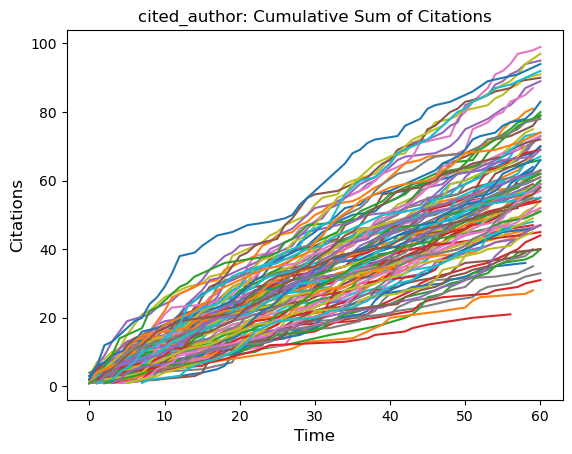

In [4]:
#plot_cumsum(s_df,s_df['paper_cited_id'].unique(), var = 'paper_cited_id', legend = False)

#plot_cumsum(m_df,m_df['cited_author'].unique(), var = 'cited_author', legend = False)

0.97563324084546 0.011879112508977933 0.08123926073820412 0.0025216770379040453


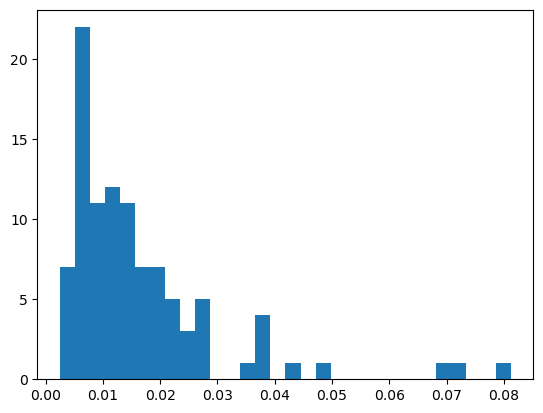

In [15]:
# what are the returns of every sci j at each time step. Columns are time steps and rows are scientist
returns_true = get_returns(df,num_authors, cumulative_time = True) # calculate the return for only that time step
returns_false = get_returns(df,num_authors, cumulative_time = False) # calculate the return UP TO that time step

r_avg, r_var = get_r_var_mean(returns_true)
print(r_avg.max(),r_avg.min(),r_var.max(),r_var.min())

plt.hist(r_var,30);


In [211]:
times = np.arange(30)
counts = df[df['time'].isin(times)]['cited_author'].value_counts().sort_index()
counts.mean()

30.0

In [212]:
#s_df
# return is the number of citations over the average numcer of citaions for that year
def get_returns(df, num_authors, cumulative_time = True):
    r_list = []
    zeros = pd.Series(np.zeros(num_authors),np.arange(num_authors), name = 'zero')
    times = []
    for t in df['time'].unique():
        #num_citation_t = df[df['time'] == t]['cited_author'].value_counts()
        if cumulative_time:
            #print(times)
            times.append(t)
            counts = df[df['time'].isin(times)]['cited_author'].value_counts().sort_index()
        else:
            counts = df[df['time'] == t]['cited_author'].value_counts().sort_index()
        avg, max, min, std = np.mean(counts), np.max(counts), np.min(counts), np.std(counts)
        #print(avg, max, min, std)
        zeros_counts = pd.merge(zeros,counts,how = 'outer', left_index = True, right_index = True).fillna(0)
        
        num_cite_t = zeros_counts['zero'] + zeros_counts['count']
        # since we always have 100 citations then there will be an average of 1
        #avg = np.mean(num_citation_t)
        # this one does NOT work
        #r = (num_citation_t - avg) / num_citation_t.max()
        
        # https://medium.com/analytics-vidhya/feature-scaling-normalization-standardization-and-scaling-c920ed3637e7
        # min max scaling. Notice that we are using the min and max from counts. Otherwise the min is 0, and that doesn't scale the data
        # so we scale by the smallest none zero number
        r = (num_cite_t - min) / (max - min)
        # mean normilzation. this works well, but the numbers are super small. 
        #r = (num_cite_t - avg) / (max - min)
        # Standardization. This isn't bad but it has more positive returns than negative returns. 
        #r = (num_cite_t - avg) / num_cite_t.std()
        
        r_list.append(r)
    return pd.concat(r_list, axis = 1)
# at some point the average becomes the same as the time step which is weird. Is the growth of this field linear?
# the max value is almost always the same so it seems like that is linear


1.639344262295082 5 1 0.7472964800027203
2.7027027027027026 7 1 1.6168849741779483
3.6144578313253013 13 1 2.568724428190155
4.49438202247191 16 1 3.362461630057567
5.319148936170213 17 1 3.9819079302580653
6.185567010309279 20 1 4.518757919175086
7.070707070707071 25 1 5.111390578058494
8.080808080808081 29 1 5.674107000761994
9.0 29 1 5.834380858325929
10.0 31 2 6.329296959378664
11.0 32 2 6.593936608733815
12.0 34 2 6.870225614927067
13.0 36 2 7.193052203341778
14.0 40 2 7.731752712031082
15.0 44 2 8.223138087129511
16.0 46 3 8.604649905719581
17.0 47 3 8.728115489611719
18.0 49 4 9.118113840043893
19.0 52 4 9.4424573072903
20.0 55 4 9.844795579391175
21.0 56 4 10.062802790475425
22.0 60 4 10.469957019969089
23.0 60 5 10.67988763985839
24.0 63 7 10.954451150103322
25.0 67 8 11.18570516328765
26.0 71 8 11.680753400359071
27.0 74 9 11.975808949711915
28.0 77 9 12.168812596141006
29.0 77 9 12.271104269787623
30.0 81 9 12.749117616525467
31.0 81 9 12.943724348115577
32.0 81 9 13.1681433

0         1         2         3       4         5         6         7   \
0  -0.25 -0.166667 -0.083333 -0.066667 -0.0625  0.052632  0.041667  0.107143   
1   0.25  0.333333  0.333333  0.466667  0.5625  0.578947  0.500000  0.500000   
2  -0.25  0.333333  0.166667  0.133333  0.1875  0.315789  0.291667  0.285714   
3   0.00  0.000000  0.000000  0.000000  0.0625  0.052632  0.083333  0.071429   
4   0.25  0.500000  0.500000  0.600000  0.6875  0.631579  0.541667  0.500000   
..   ...       ...       ...       ...     ...       ...       ...       ...   
95 -0.25 -0.166667 -0.083333 -0.066667  0.0000  0.000000  0.000000  0.000000   
96 -0.25 -0.166667  0.000000  0.000000  0.0000  0.000000  0.000000  0.035714   
97 -0.25  0.000000  0.083333  0.200000  0.1875  0.210526  0.208333  0.214286   
98 -0.25 -0.166667  0.000000  0.000000  0.0000  0.000000  0.083333  0.071429   
99 -0.25  0.000000  0.000000  0.000000  0.0000  0.000000  0.000000  0.035714   

          8         9   ...        51        52        53        54        55  \
0   0.107143  0.172414  ...  0.208333  0.210526  0.208333  0.197917  0.187500   
1   0.571429  0.517241  ...  0.395833  0.410526  0.416667  0.416667  0.416667   
2   0.392857  0.413793  ...  0.489583  0.505263  0.531250  0.520833  0.520833   
3   0.142857  0.103448  ...  0.072917  0.063158  0.104167  0.104167  0.093750   
4   0.571429  0.586207  ...  0.614583  0.621053  0.625000  0.635417  0.635417   
..       ...       ...  ...       ...       ...       ...       ...       ...   
95  0.000000  0.034483  ...  0.229167  0.231579  0.229167  0.218750  0.208333   
96  0.142857  0.206897  ...  0.135417  0.136842  0.156250  0.145833  0.135417   
97  0.214286  0.206897  ...  0.343750  0.347368  0.343750  0.343750  0.343750   
98  0.107143  0.068966  ...  0.187500  0.178947  0.177083  0.197917  0.197917   
99  0.071429  0.103448  ...  0.197917  0.200000  0.197917  0.187500  0.177083   

          56        57        58        59        60  
0   0.187500  0.187500  0.208333  0.234694  0.237624  
1   0.406250  0.395833  0.395833  0.397959  0.396040  
2   0.541667  0.541667  0.531250  0.540816  0.514851  
3   0.104167  0.093750  0.083333  0.081633  0.079208  
4   0.625000  0.635417  0.635417  0.632653  0.613861  
..       ...       ...       ...       ...       ...  
95  0.208333  0.197917  0.187500  0.183673  0.188119  
96  0.125000  0.114583  0.104167  0.112245  0.099010  
97  0.354167  0.354167  0.354167  0.377551  0.376238  
98  0.187500  0.197917  0.208333  0.224490  0.207921  
99  0.177083  0.197917  0.187500  0.193878  0.178218  

[100 rows x 61 columns]

In [202]:

# do we have to unscale the returns now that we have them?
def get_r_var_mean(returns):
    r_bar = returns.mean(axis= 1)#.round(4).mean()
    r_s = returns.var(axis = 1)
    return r_bar, r_s


0.9639111760163024 -0.00016370576770273802 0.02472425107539755 0.0008026324908341462


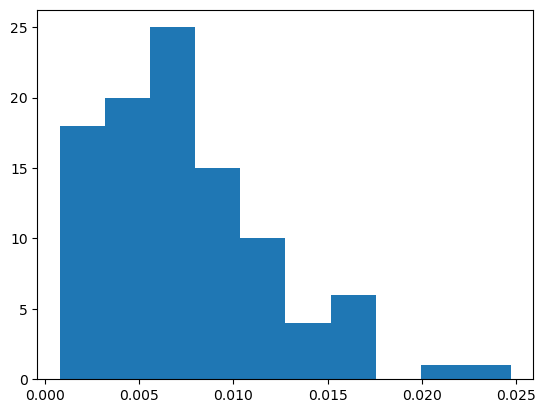

In [187]:
# this shows that the least risky person also has the fewest returns
#r_bar[r_s[r_s == r_s.min()].index[0]]
# plot the histogram for variance or for average scienctist return
#plt.hist(r_bar, 20);


<Axes: >

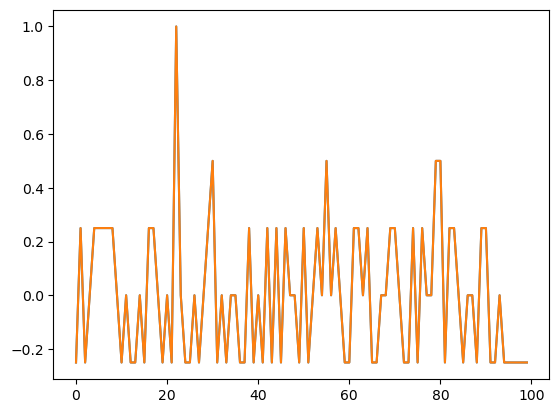

In [197]:
get_returns(df,num_authors, cumulative_time = True).iloc[:,0].plot()
get_returns(df,num_authors, cumulative_time = False).iloc[:,0].plot()

<Axes: >

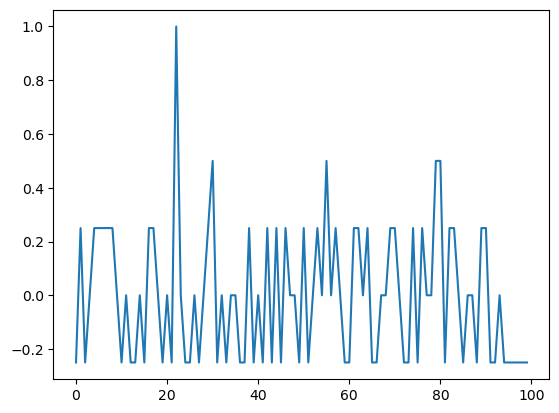

In [27]:
m = papers
steps = 60
for i in range(1, steps + 1):
    new_citations = get_citations(m)
    
    new_cited_authors = get_new_cited_authors(m,new_citations)
    published_paper_ids = get_new_paper_ids(m, new_citations)
    #print([np.arange(num_authors), published_paper_ids, new_cited_authors, new_citations,np.ones(len(new_citations)) * i])
    step = np.array([np.arange(num_authors), published_paper_ids, new_cited_authors, new_citations,np.ones(len(new_citations)) * i])

    m = np.concatenate([m,step], axis = 1)
    #print(sim)
    #print()
#print(s)
m_df = pd.DataFrame(m.T, columns = ['citing_author','paper_citing_id','cited_author' ,'paper_cited_id', 'time' ] )


In [6]:
s = papers
steps = 60
for i in range(1, steps + 1):
    new_citations = get_citations(s)
    
    new_cited_authors = get_new_cited_authors(s,new_citations)
    published_paper_ids = get_new_paper_ids(s, new_citations)
    #print([np.arange(num_authors), published_paper_ids, new_cited_authors, new_citations,np.ones(len(new_citations)) * i])
    step = np.array([np.arange(num_authors), published_paper_ids, new_cited_authors, new_citations,np.ones(len(new_citations)) * i])

    s= np.concatenate([s,step], axis = 1)
    #print(sim)
    #print()
#print(s)
s_df = pd.DataFrame(s.T, columns = ['citing_author','paper_citing_id','cited_author' ,'paper_cited_id', 'time' ] )


In [19]:
s_df['time'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60.])

In [36]:
#new_citations = get_citations(sim)
#papers_ids = sim[1,:]
# CAUTION. once we have multiple citations then the paper_id shows up multiple times in papers[1,:]
# i think this will be fine since we would only be grabbing the first index where the paper is cited and that corresponds to the same author regardless

#[np.where(papers_ids == paper_citation)[0][0] for paper_citation in new_citations]
get_new_cited_authors(sim,new_citations)

array([5., 6., 2., 9., 3., 6., 7., 3., 6., 8.])

array([5., 6., 2., 9., 3., 6., 7., 3., 6., 8.])

In [343]:

get_new_cited_authors(papers, get_citations(papers))

[7, 1, 5, 5, 3, 4, 6, 8, 6, 3]

In [35]:
#def get_author_from_paper()
# get who is being cited from a list of paper ids

#def get_new_paper_ids()
# add new paper_ids that line up with new publishing

get_new_paper_ids(papers, num_authors)

prob_publish = np.array([[np.random.uniform(0,1) for i in range(num_authors)]])
risk = np.array([[np.random.uniform(0,1) for i in range(num_authors)]])
#np.concatenate([prob_publish, papers])
print(risk,prob_publish)
print(np.where(risk > prob_publish)[1])

[[0.16627559 0.70086279 0.56210348 0.22363568 0.49102034 0.82901762
  0.96158771 0.61118658 0.1787909  0.18458836]] [[0.45146013 0.49935843 0.5847957  0.03032781 0.5781684  0.76017085
  0.76808538 0.04384853 0.12957866 0.3037694 ]]
[1 3 5 6 7 8]


In [14]:
s = papers
risk = np.array([[np.random.uniform(0,1) for i in range(num_authors)]])
steps = 60
for i in range(1, steps + 1):
    new_citations, pub_authors = get_citations_risk(s, risk)
    
    new_cited_authors = get_new_cited_authors(s,new_citations)
    published_paper_ids = get_new_paper_ids(s, new_citations)
    #print([np.arange(num_authors), published_paper_ids, new_cited_authors, new_citations,np.ones(len(new_citations)) * i])
    step = np.array([pub_authors, published_paper_ids, new_cited_authors, new_citations,np.ones(len(new_citations)) * i])

    s= np.concatenate([s,step], axis = 1)
    #print(sim)
    #print()
#print(s)
s_df = pd.DataFrame(s.T, columns = ['citing_author','paper_citing_id','cited_author' ,'paper_cited_id', 'time' ] )
print(risk)

In [16]:
print(risk)
s_df

[[0.6448422  0.58580201 0.46403685 0.37802646 0.02690298 0.78739502
  0.91075333 0.14686385 0.47639019 0.31863437 0.83921524 0.42240383
  0.40949352 0.32795822 0.31833073 0.30119906 0.03355733 0.43947351
  0.67026521 0.09393296 0.08004957 0.26293647 0.18101899 0.24174651
  0.82831229 0.35241137 0.23803216 0.92295453 0.7196429  0.11248476
  0.23878835 0.59246737 0.22840784 0.28265395 0.00557432 0.70979564
  0.76551147 0.09473877 0.46618686 0.40040004 0.27128137 0.13214572
  0.9307748  0.97391677 0.68845185 0.40725298 0.76564729 0.59256441
  0.84391393 0.64178706 0.19517109 0.5769905  0.15034408 0.93774564
  0.14152704 0.01896511 0.93719482 0.82056874 0.23526783 0.98985412
  0.12282616 0.33953265 0.67086174 0.24311364 0.71059302 0.1658207
  0.83987487 0.58514269 0.44000229 0.87370663 0.8918554  0.89410353
  0.02942348 0.30237533 0.5885875  0.60368554 0.96314973 0.60772651
  0.11934738 0.29227542 0.46854038 0.09581011 0.16317315 0.74961085
  0.40880563 0.92358759 0.63830319 0.94373373 0.7

citing_author  paper_citing_id  cited_author  paper_cited_id  time
0               0.0              0.0          74.0            74.0   0.0
1               1.0              1.0          60.0            60.0   0.0
2               2.0              2.0          35.0            35.0   0.0
3               3.0              3.0          37.0            37.0   0.0
4               4.0              4.0          83.0            83.0   0.0
...             ...              ...           ...             ...   ...
2981           88.0           2981.0          19.0            19.0  60.0
2982           89.0           2982.0          26.0            26.0  60.0
2983           90.0           2983.0          94.0           298.0  60.0
2984           91.0           2984.0          97.0           199.0  60.0
2985           97.0           2985.0          22.0          2212.0  60.0

[2986 rows x 5 columns]

In [23]:
print(risk)
max_min = [np.argmax(risk),np.argmin(risk)]
s_df[s_df['citing_author'].isin(max_min)]['citing_author'].value_counts()
s_df[s_df['cited_author'].isin(max_min)]['cited_author'].value_counts()


[[0.6448422  0.58580201 0.46403685 0.37802646 0.02690298 0.78739502
  0.91075333 0.14686385 0.47639019 0.31863437 0.83921524 0.42240383
  0.40949352 0.32795822 0.31833073 0.30119906 0.03355733 0.43947351
  0.67026521 0.09393296 0.08004957 0.26293647 0.18101899 0.24174651
  0.82831229 0.35241137 0.23803216 0.92295453 0.7196429  0.11248476
  0.23878835 0.59246737 0.22840784 0.28265395 0.00557432 0.70979564
  0.76551147 0.09473877 0.46618686 0.40040004 0.27128137 0.13214572
  0.9307748  0.97391677 0.68845185 0.40725298 0.76564729 0.59256441
  0.84391393 0.64178706 0.19517109 0.5769905  0.15034408 0.93774564
  0.14152704 0.01896511 0.93719482 0.82056874 0.23526783 0.98985412
  0.12282616 0.33953265 0.67086174 0.24311364 0.71059302 0.1658207
  0.83987487 0.58514269 0.44000229 0.87370663 0.8918554  0.89410353
  0.02942348 0.30237533 0.5885875  0.60368554 0.96314973 0.60772651
  0.11934738 0.29227542 0.46854038 0.09581011 0.16317315 0.74961085
  0.40880563 0.92358759 0.63830319 0.94373373 0.7

cited_author
59.0    34
34.0    20
Name: count, dtype: int64

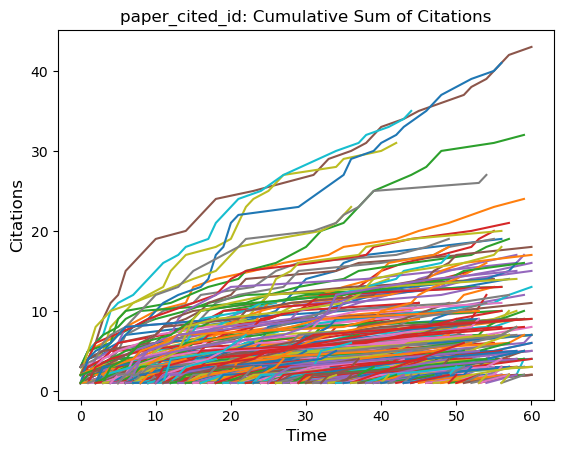

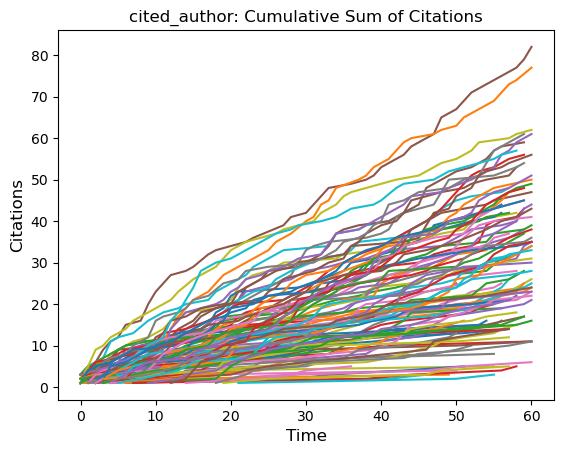

In [15]:
s_df = pd.DataFrame(s.T, columns = ['citing_author','paper_citing_id','cited_author' ,'paper_cited_id', 'time' ] )
plot_cumsum(s_df,s_df['paper_cited_id'].unique(), var = 'paper_cited_id', legend = False)
plot_cumsum(s_df,s_df['cited_author'].unique(), var = 'cited_author', legend = False)

In [3]:
num_authors = 10
steps = 60
papers = init_web(num_authors)

print(papers)
print()
sim = papers


for i in range(1,steps + 1):
    new_citations = get_citations(sim)
    published_paper_ids = get_new_paper_ids(sim, num_authors)
    new_cited_authors = get_new_cited_authors(sim,new_citations)
    #print([np.arange(num_authors), published_paper_ids, new_cited_authors, new_citations,np.ones(len(new_citations)) * i])
    step = np.array([np.arange(num_authors), published_paper_ids, new_cited_authors, new_citations,np.ones(len(new_citations)) * i])

    sim = np.concatenate([sim,step], axis = 1)
    #print(sim)
    #print()

print(sim)

[[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [7. 9. 4. 5. 2. 9. 5. 2. 5. 5.]
 [7. 9. 4. 5. 2. 9. 5. 2. 5. 5.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

[[  0.   1.   2. ...   7.   8.   9.]
 [  0.   1.   2. ... 607. 608. 609.]
 [  7.   9.   4. ...   9.   7.   2.]
 [  7.   9.   4. ...  29.   7. 512.]
 [  0.   0.   0. ...  60.  60.  60.]]


In [6]:
#plt.plot(sim[]
sim[2,:]

array([  7.,   3.,   4.,   8.,   1.,   6.,   5.,   8.,   2.,   4.,   4.,
         6.,   3.,   5.,   5.,   8.,   5.,   7.,   4.,   1.,   1.,   4.,
         9.,   8.,   0.,   8.,   2.,  14.,   2.,   0.,   7.,  20.,  26.,
        15.,  16.,   4.,   0.,   8.,   6.,  16.,  22.,  35.,   7.,  31.,
         7.,  27.,   0.,   8.,   5.,   3.,  32.,  14.,  28.,   0.,   0.,
        30.,   0.,   5.,   4.,  28.,  35.,  45.,  38.,  14.,   3.,  24.,
        27.,   3.,   8.,  52.,   7.,   5.,  10.,  47.,  27.,  23.,   5.,
         5.,   4.,  61.,   3.,   7.,   6.,   0.,  36.,   5.,   6.,  45.,
        14.,  26.,  14.,   0.,  30.,  32.,  70.,  47.,  70.,  67.,  14.,
         1.,   7.,  30.,  83.,  10.,  77.,  84.,   7.,  23.,   7.,   4.,
        15.,  24.,  49.,  54.,   0.,   5.,  43.,  22.,   7.,  92.,  40.,
        27.,  14.,   7.,   0.,  27.,  61.,  66.,   4.,  59.,   4.,  30.,
        52., 114.,  71.,   4.,  30.,  27.,  61.,  26., 126.,  14.,   7.,
        32.,   4.,   3.,  71.,  19.,  43.,   4.,   

In [39]:
sim_df = pd.DataFrame(sim.T, columns = ['citing_author','paper_citing_id','cited_author' ,'paper_cited_id', 'time' ] )

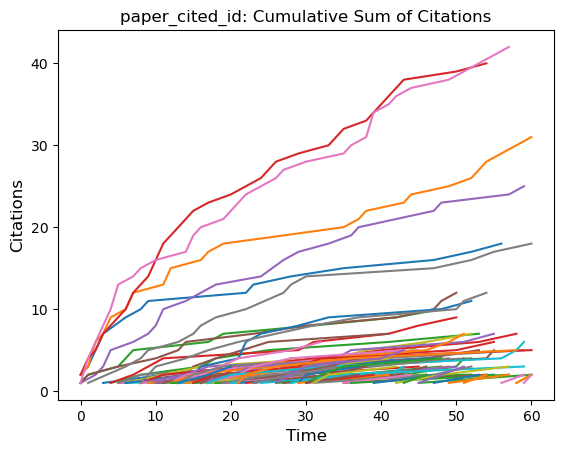

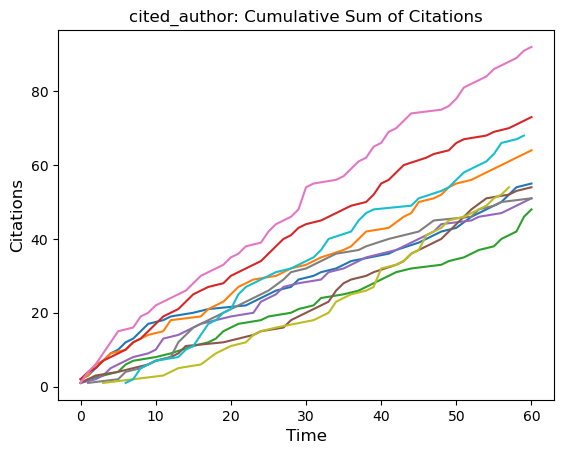

In [40]:
plot_cumsum(sim_df,sim_df['paper_cited_id'].unique(), var = 'paper_cited_id', legend = False)
plot_cumsum(sim_df,sim_df['cited_author'].unique(), var = 'cited_author', legend = False)


In [19]:
sim_df

citing_author  paper_citing_id  cited_author  paper_cited_id  time
0              0.0              0.0           7.0             7.0   0.0
1              1.0              1.0           3.0             3.0   0.0
2              2.0              2.0           4.0             4.0   0.0
3              3.0              3.0           8.0             8.0   0.0
4              4.0              4.0           1.0             1.0   0.0
..             ...              ...           ...             ...   ...
605            5.0            605.0         165.0           165.0  60.0
606            6.0            606.0          35.0            35.0  60.0
607            7.0            607.0         421.0           421.0  60.0
608            8.0            608.0          89.0            89.0  60.0
609            9.0            609.0         108.0           108.0  60.0

[610 rows x 5 columns]

In [406]:
np.savetxt('%d_authors_%d_steps_%d_maxcite_numpy.txt'% (num_authors, steps, 1), sim, fmt='%d')
#b = np.loadtxt('test1.txt', dtype=int)



In [371]:
sim[1,:]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19.])

In [221]:
#list(papers[3,:]).count(np.unique(papers[1:]))
papers

array([[0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [3., 7., 8., 2., 2., 1., 9., 2., 2., 4.],
       [3., 7., 8., 2., 2., 1., 9., 2., 2., 4.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [300]:
#papers[[2,3],:]





[4. 1. 1. 4. 4. 1. 1. 0. 1. 0.]
[[0. 0.]
 [1. 1.]
 [2. 4.]
 [3. 1.]
 [4. 1.]
 [5. 0.]
 [6. 0.]
 [7. 1.]
 [8. 1.]
 [9. 1.]]
[2.0, 1.0, 3.0, 2.0, 2.0, 8.0, 9.0, 5.0, 9.0, 6.0]


In [213]:
#t = np.array([1,2,3,4,5])
#s = np.array([1,3,3,6,6])
#any(np.where(cited == data[0,:],True, False))


#data[0,:].index(8)



In [27]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
for z in zip(author_ids,paper_ids):
    print(z)
#np.array([author, paper] for author zip(author_ids,paper_ids))
np.concatenate([author_ids,paper_ids])

(0, 0)
(1, 1)
(2, 2)
(3, 3)
(4, 4)
(5, 5)
(6, 6)
(7, 7)
(8, 8)
(9, 9)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])